In [939]:
# import packages
import networkx as nx
import random 
import numpy as np                                                                   
import pandas as pd
import matplotlib.pyplot as plt                                                    
import warnings 

In [1106]:
df = pd.read_csv('df_web_extracted_DAG.csv')

In [1107]:
D = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr=None, create_using=nx.DiGraph)

In [943]:
node_num = 1000  # the number of nodes you would like to confirm (exogeneous varible)
boundary = D.number_of_nodes() - node_num
allnodes = list(nx.nodes(D))
newnodes = [e for e in allnodes if e >= boundary]
oldnodes = [e for e in allnodes if e < boundary]

In [1091]:
#def random_path_mix_repo(D, start_at, uninfo_set, false_outedges):
    #node = start_at
    #path = [node]
    #repo = [] # list for elicited report "1"
    #while True:
        #if node in uninfo_set: # uninformative strategy
            ##to = list(nx.dfs_preorder_nodes(D, source=node, depth_limit=5))
            ##to.pop(0) 
            #to = [e for e in nx.nodes(D) if e < node]
            #if len(to) == 0: break
            #elif len(to) < false_outedges: candidate = random.sample(to, -(-len(to)//2)) # round up
            #else: candidate = random.sample(to, false_outedges)
            ##candidate = random.sample(to, -(-len(to)//2)) # round up
            ##candidate = random.sample(to, -(-len(to)//2)) 
            #edge_list = [] # make fake edges
            #for i in range(len(candidate)):
                #edge = (node, candidate[i])
                #edge_list.append(edge)
            #repo.append(edge_list)
            #node = np.random.choice(candidate)
        #else: # truthful strategy
            #to = D[node]
            #if len(to) == 0: break
            #repo.append(list(D.out_edges(node)))
            #node = np.random.choice(list(to))  
        #path.append(node)
    #repo.append([])
    #return path, repo

In [1204]:
def random_path_mix_repo(D, start_at, uninfo_set, false_outedges, existing_nodes):
    node = start_at
    path = [start_at]
    repo = [] # list for elicited report "1"
    while True:
        if node in uninfo_set: # uninformative strategy
            targets = list(set(existing_nodes) - {node})
            candidate = random.sample(targets, -(-len(targets)*false_outedges//1000))
            edge_list = [] # make fake edges
            for i in range(len(candidate)):
                edge = (node, candidate[i])
                edge_list.append(edge)
            repo.append(edge_list)
            node = np.random.choice(candidate)
        else: # truthful strategy
            to = D[node]
            if len(to) == 0: break
            repo.append(list(D.out_edges(node)))
            node = np.random.choice(list(to))  
        if node in set(path): break
        path.append(node)
    repo.append([])
    return path, repo

In [1205]:
# For example...
x = random_path_mix_repo(D, 1246, {i for i in range(D.number_of_nodes()) if i % 2 == 0}, 2, list(D.nodes())) 
print(x)

([1246, 232, 236, 247, 1, 0, 1356, 847, 229, 193, 148, 986, 1274, 597, 150, 539], [[(1246, 411), (1246, 1375), (1246, 232)], [(232, 1181), (232, 1057), (232, 236)], [(236, 1044), (236, 408), (236, 247)], [(247, 0), (247, 1)], [(1, 0)], [(0, 1211), (0, 1356), (0, 625)], [(1356, 847), (1356, 28), (1356, 1380)], [(847, 193), (847, 229), (847, 548), (847, 612), (847, 625), (847, 794), (847, 148), (847, 86)], [(229, 193), (229, 148)], [(193, 148)], [(148, 1112), (148, 132), (148, 986)], [(986, 1114), (986, 901), (986, 1274)], [(1274, 745), (1274, 597), (1274, 713)], [(597, 150)], [(150, 887), (150, 539), (150, 34)], [(539, 150)], []])


In [946]:
def reviewer_assignment(list1, list2): # Algorithm 5 of the thesis
    # list 1: vertices in a path 
    # list 2: vertives in the other path 
    if len(list1) >= len(list2):
        peer = list1
        while [i for i, j in zip(peer, list1) if i == j] != []:
            peer = random.sample(list2, len(list2)) + random.choices(list2, k = len(list1) - len(list2))
            random.shuffle(peer)
        return list1, peer
    else:
        peer = list2
        while [i for i, j in zip(peer, list2) if i == j] != []:
            peer = random.sample(list1, len(list1)) + random.choices(list1, k = len(list2) - len(list1))
            random.shuffle(peer)
        return peer, list2 

In [947]:
# For example...
x = reviewer_assignment([2,1,0], [1, 0]) 
y = reviewer_assignment([1400, 687, 338, 77, 61, 59, 36, 1, 0], [1247, 1010, 734, 59, 36, 0]) 
print(x)
print(y)

([2, 1, 0], [0, 0, 1])
([1400, 687, 338, 77, 61, 59, 36, 1, 0], [0, 734, 0, 1010, 734, 1247, 59, 1247, 36])


In [1089]:
#def report_overlapping(list1, list2, uninfo_set, false_outedges): 
    ## list 1: vertices to be reviewed 
    ## list 2: vertives to review 
    #repo = []
    #for i in range(len(list1)): 
        #if list2[i] in uninfo_set:
            ##to = list(nx.dfs_preorder_nodes(D, source=list1[i], depth_limit=5))
            ##to.pop(0) 
            ##candidate = random.sample(to, -(-len(to)//2)) # round up
            #to = [e for e in nx.nodes(D) if e < list1[i]] 
            #if len(to) < false_outedges: candidate = random.sample(to, -(-len(to)//2)) # round up
            #else: candidate = random.sample(to, false_outedges)
            #edge_list = [] # make fake edges
            #for j in range(len(candidate)):
                #edge = (list1[i], candidate[j])
                #edge_list.append(edge)
            #repo.append(edge_list)
        #else:
            #to = D[list1[i]]
            #repo.append(list(D.out_edges(list1[i])))
    #return repo

In [1208]:
def report_overlapping(list1, list2, uninfo_set, false_outedges, existing_nodes): 
    # list 1: vertices to be reviewed 
    # list 2: vertives to review 
    repo = []
    for i in range(len(list1)): 
        if list2[i] in uninfo_set:
            targets = list(set(existing_nodes) - {list1[i]})
            candidate = random.sample(targets, -(-len(targets)*false_outedges//1000))
            edge_list = [] # make fake edges
            for j in range(len(candidate)):
                edge = (list1[i], candidate[j])
                edge_list.append(edge)
            repo.append(edge_list)
        else:
            to = D[list1[i]]
            repo.append(list(D.out_edges(list1[i])))
    return repo

In [1209]:
# For example...
x = report_overlapping([1400, 687, 338, 77, 61, 59, 36, 1, 0],[1247, 1247, 734, 1010, 1010, 1247, 1247, 734, 1010], {i for i in range(D.number_of_nodes()) if i % 2 == 0}, 2, list(D.nodes())) 
y = report_overlapping([1247, 1247, 734, 1010, 1010, 1247, 1247, 734, 1010],[1400, 687, 338, 77, 61, 59, 36, 1, 0], {i for i in range(D.number_of_nodes()) if i % 2 == 0}, 2, list(D.nodes())) 
print(x)
print(y)

[[(1400, 877), (1400, 1251)], [(687, 338)], [(338, 571), (338, 442), (338, 319)], [(77, 511), (77, 522), (77, 961)], [(61, 1031), (61, 1157), (61, 119)], [(59, 36)], [(36, 28)], [(1, 1072), (1, 830), (1, 826)], [(0, 1431), (0, 192), (0, 646)]]
[[(1247, 133), (1247, 744), (1247, 185)], [(1247, 1010), (1247, 761), (1247, 554), (1247, 638), (1247, 734)], [(734, 570), (734, 428), (734, 561)], [(1010, 761), (1010, 734), (1010, 638), (1010, 554)], [(1010, 761), (1010, 734), (1010, 638), (1010, 554)], [(1247, 1010), (1247, 761), (1247, 554), (1247, 638), (1247, 734)], [(1247, 835), (1247, 855), (1247, 1139)], [(734, 638), (734, 554)], [(1010, 1245), (1010, 350), (1010, 422)]]


In [950]:
def zero_reports(list1, list2, list3, list4, list5, list6, list7): 
    # list 1: vertices to be reviewed  (duplicated)
    # list 2: vertives to review  (duplicated)
    # list 3: vertices in one path including list1 (non-duplicated)
    # list 4: vertices in the other path including list2 (non-duplicated)
    # list 5: list 1's out-edge reports by list 1  (2D, non-duplicated)
    # list 6: list 2's out-edge reports by list 2  (2D, non-duplicated)
    # list 7: list 1's out-edge reports by list 2  (2D, duplicated)
        
    list8 = [] # list 1's out-edge reports by list 1 (2D, duplicated)
    for h in range(len(list1)):
        z = list3.index(list1[h])
        list8.append(list5[z])
    
    list9 = [] # list 2's out-edge reports by list 2 (2D, duplicated)
    for h in range(len(list2)):
        z = list4.index(list2[h])
        list9.append(list6[z])
        
    zerorepo1 = [] # 0 reports by vertices in list 1
    for i in range(len(list1)): 
        x = list(set(list7[i]) - set(list8[i]))
        y = list({item for t in list9[i] for item in t})  
        for k in range(len(y)):
            if (list1[i], y[k]) not in set(list8[i]): 
                x.append((list1[i], y[k]))
        x = list(set(x)) # eliminate dupilicated 0 reports
        zerorepo1.append(x)
        
    zerorepo2 = [] # 0 reports by vertices in list 2 (unsorted)
    for j in range(len(list1)):
        zerorepo2.append(list((set(list8[j]) | set(zerorepo1[j])) - set(list7[j])))
        
    return zerorepo1, zerorepo2, list8, list9 # here we return list8 and list9 as they will be used later

In [951]:
# For example...
zero_reports(
    [0,1,1,2,2,3],
    [9,9,6,10,7,8],
    [0,1,2,3,4,5],
    [5,6,7,8,9,10],
    [[(0,1),(0,20)],[(1,2),(1,22)],[(2,3),(2,100)],[]],
    [[(5,101),(5,98)],[(6,7),(6,9)],[(7,8),(7,120)],[(8,9),(8,300)],[],[(10,99),(10,970)]],
    [[(0,20),(0,300)],[(1,2),(1,22)],[(1,8),(1,9)],[(2,6),(2,7)],[(2,500),(2,54)],[]]
)

([[(0, 300)],
  [],
  [(1, 6), (1, 7), (1, 8), (1, 9)],
  [(2, 7), (2, 10), (2, 99), (2, 6), (2, 970)],
  [(2, 8), (2, 7), (2, 54), (2, 500), (2, 120)],
  [(3, 8), (3, 9), (3, 300)]],
 [[(0, 1)],
  [],
  [(1, 6), (1, 7), (1, 2), (1, 22)],
  [(2, 100), (2, 10), (2, 3), (2, 99), (2, 970)],
  [(2, 7), (2, 100), (2, 3), (2, 120), (2, 8)],
  [(3, 8), (3, 9), (3, 300)]],
 [[(0, 1), (0, 20)],
  [(1, 2), (1, 22)],
  [(1, 2), (1, 22)],
  [(2, 3), (2, 100)],
  [(2, 3), (2, 100)],
  []],
 [[],
  [],
  [(6, 7), (6, 9)],
  [(10, 99), (10, 970)],
  [(7, 8), (7, 120)],
  [(8, 9), (8, 300)]])

In [952]:
def DG13 (x,y,x2,y2): 
    return (x*y + (1-x)*(1-y)) - (x2*y2 + (1-x2)*(1-y2))

In [953]:
def reward_computation(list1, list2): 
    # list 1: 2D list for report1 of all vertives
    # list 2: 2D list for all reports of all vertives
       
    rewards = []
    for i in range(len(list2)): # len(list1) = len(list2) 
        x_repo = random.choice(list2[i])
        x = 1 if x_repo in set(list1[i]) else 0 
        
        # select one peer at random 
        a = [a for a in list2 if x_repo in set(a)]
        a.pop(0)
        peer = random.choice(a)
        j = list2.index(peer) 
        
        y = 1 if x_repo in set(list1[j]) else 0
        
        x2_repo = random.choice([x for x in list2[i] if x != x_repo]) 
        x2 = 1 if x2_repo in set(list1[i]) else 0
        y2_repo = random.choice([x for x in list2[j] if x != x_repo]) 
        y2 = 1 if y2_repo in set(list1[j]) else 0
        rewards.append(DG13(x,y,x2,y2))
    return rewards

In [954]:
# For example...
x1 =  [[(6,9)],[(0,1),(6,9),(2,200)],[(0,1),(3,6),(2,200)]]
x2 = [[(0,1),(5,9),(1,100),(6,9)],[(0,1),(3,6),(6,9),(2,200)],[(0,1),(5,9),(1,100),(3,6),(2,200)]]
reward_computation(x1,x2)

[1, -1, 1]

In [1122]:
#randomness_range = 11 #exogeneous variable for epsilon

#ex_rewards = []
#for l in range(1,10): # the number of false out-edges (from 1 to 9)
    #results = []
    #print('Computing expected rewards in case of the number of false out-edges = ' + str(l))
    #for k in range(randomness_range):
        #uninfo = set(random.sample(list(D.nodes()), round(int(D.number_of_nodes())*k*0.1)))

        #result = [[] for i in range(D.number_of_nodes())]
        #for i in range(1000):
            ## two-path drawing and gathering reports
            #newnode = i + boundary
            #candidates = [e for e in allnodes if e < newnode]
            #candidates.remove(0)
            #x = np.random.choice(candidates)
            #ans_x = random_path_mix_repo(D, x, uninfo, l)
            #y = np.random.choice(candidates)
            #ans_y = random_path_mix_repo(D, y, uninfo, l) #note that, for our dataset, the two paths must intersect in node 0.

            ## reviewer assignment
            #ans_rev = reviewer_assignment(ans_x[0], ans_y[0])

            ## report for overlapping tasks
            #ans_over_x = report_overlapping(ans_rev[0], ans_rev[1], uninfo, l)
            #ans_over_y = report_overlapping(ans_rev[1], ans_rev[0], uninfo, l)

            ## elicit 0 reports
            #ans_zero_x = zero_reports(ans_rev[0], ans_rev[1], ans_x[0], ans_y[0], ans_x[1], ans_y[1], ans_over_x)
            #ans_zero_y = zero_reports(ans_rev[1], ans_rev[0], ans_y[0], ans_x[0], ans_y[1], ans_x[1], ans_over_y)

            ## sort each report
            #reviewers = list(set(ans_x[0]) | set(ans_y[0])) #P1 ∪ P2

            #report1 = [[] for i in range(len(reviewers))]
            #for j in range(len(ans_rev[0])): # len(ans_rev[0]) and len(ans_rev[1]) are the same
                #report1[reviewers.index(ans_rev[0][j])].extend(ans_zero_x[2][j])
                #report1[reviewers.index(ans_rev[0][j])].extend(ans_over_y[j])
            #for j in range(len(ans_rev[1])): 
                #report1[reviewers.index(ans_rev[1][j])].extend(ans_zero_y[2][j])
                #report1[reviewers.index(ans_rev[1][j])].extend(ans_over_x[j])

            #report0 = [[] for i in range(len(reviewers))]
            #for j in range(len(ans_rev[0])):
                #report0[reviewers.index(ans_rev[0][j])].extend(ans_zero_x[0][j])
                #report0[reviewers.index(ans_rev[1][j])].extend(ans_zero_x[1][j])
            #for j in range(len(ans_rev[1])): 
                #report0[reviewers.index(ans_rev[1][j])].extend(ans_zero_y[0][j])
                #report0[reviewers.index(ans_rev[0][j])].extend(ans_zero_y[1][j])

            #allreport = [] # all elements in allreport can be overlapping task
            #for i in range(len(reviewers)):
                #allreport.append(report1[i] + report0[i])

            ## reward computation
            #rewards = reward_computation(report1, allreport)
            ##print(rewards)

            #for i in range(len(rewards)):
                #x = reviewers[i]
                #result[x].append(rewards[i])

        #for i in range(len(result)):
            #if result[i] != []:
                #mean = sum(result[i]) / len(result[i])
                #result[i] = mean
        #result = [x for x in result if x] # remove [] from result        
        #results.append(result)

    #ex_reward = []
    #for i in range(11):
        #x = results[i]
        #mean = sum(x) / len(x)
        #ex_reward.append(mean)
        
    #ex_rewards.append(ex_reward)
    
#print('Complete!') 
#print(ex_rewards)

Computing expected rewards in case of the number of false out-edges = 1
Computing expected rewards in case of the number of false out-edges = 2
Computing expected rewards in case of the number of false out-edges = 3
Computing expected rewards in case of the number of false out-edges = 4
Computing expected rewards in case of the number of false out-edges = 5
Computing expected rewards in case of the number of false out-edges = 6
Computing expected rewards in case of the number of false out-edges = 7
Computing expected rewards in case of the number of false out-edges = 8
Computing expected rewards in case of the number of false out-edges = 9
Complete!
[[0.6087456889274974, 0.5605412700056946, 0.4645353968523342, 0.4593046096953257, 0.3921327665546795, 0.35220372173879105, 0.3307028786628744, 0.30763628412024824, 0.2849781506339907, 0.2833492547239493, 0.29465420203134807], [0.6268958269433725, 0.5354072846484121, 0.4931036272210689, 0.43232306980784924, 0.4258183313514517, 0.369374210212

In [1216]:
randomness_range = 11 #exogeneous variable for epsilon

ex_rewards = []
for l in range(1,10): # the number of false out-edges (from 1 to 9)
    results = []
    print('Computing expected rewards in case of γ = 0.00' + str(l))
    for k in range(randomness_range):
        uninfo = set(random.sample(list(D.nodes()), round(int(D.number_of_nodes())*k*0.1)))
        print('Computing expected rewards in case of ε = ' + str(k))
        
        result = [[] for i in range(D.number_of_nodes())]
        for i in range(1000):
            # two-path drawing and gathering reports
            newnode = i + boundary
            candidates = [e for e in allnodes if e < newnode]
            candidates
            x = np.random.choice(list(set(candidates) - {0}))
            ans_x = random_path_mix_repo(D, x, uninfo, l, candidates)
            y = np.random.choice(list(set(candidates) - {0}))
            ans_y = random_path_mix_repo(D, y, uninfo, l, candidates) 

            # reviewer assignment
            ans_rev = reviewer_assignment(ans_x[0], ans_y[0])

            # report for overlapping tasks
            ans_over_x = report_overlapping(ans_rev[0], ans_rev[1], uninfo, l, candidates)
            ans_over_y = report_overlapping(ans_rev[1], ans_rev[0], uninfo, l, candidates)

            # elicit 0 reports
            ans_zero_x = zero_reports(ans_rev[0], ans_rev[1], ans_x[0], ans_y[0], ans_x[1], ans_y[1], ans_over_x)
            ans_zero_y = zero_reports(ans_rev[1], ans_rev[0], ans_y[0], ans_x[0], ans_y[1], ans_x[1], ans_over_y)

            # sort each report
            reviewers = list(set(ans_x[0]) | set(ans_y[0])) #P1 ∪ P2

            report1 = [[] for i in range(len(reviewers))]
            for j in range(len(ans_rev[0])): # len(ans_rev[0]) and len(ans_rev[1]) are the same
                report1[reviewers.index(ans_rev[0][j])].extend(ans_zero_x[2][j])
                report1[reviewers.index(ans_rev[0][j])].extend(ans_over_y[j])
            for j in range(len(ans_rev[1])): 
                report1[reviewers.index(ans_rev[1][j])].extend(ans_zero_y[2][j])
                report1[reviewers.index(ans_rev[1][j])].extend(ans_over_x[j])

            report0 = [[] for i in range(len(reviewers))]
            for j in range(len(ans_rev[0])):
                report0[reviewers.index(ans_rev[0][j])].extend(ans_zero_x[0][j])
                report0[reviewers.index(ans_rev[1][j])].extend(ans_zero_x[1][j])
            for j in range(len(ans_rev[1])): 
                report0[reviewers.index(ans_rev[1][j])].extend(ans_zero_y[0][j])
                report0[reviewers.index(ans_rev[0][j])].extend(ans_zero_y[1][j])

            allreport = [] # all elements in allreport can be overlapping task
            for i in range(len(reviewers)):
                allreport.append(report1[i] + report0[i])

            # reward computation
            rewards = reward_computation(report1, allreport)
            #print(rewards)

            for i in range(len(rewards)):
                x = reviewers[i]
                result[x].append(rewards[i])

        for i in range(len(result)):
            if result[i] != []:
                mean = sum(result[i]) / len(result[i])
                result[i] = mean
        result = [x for x in result if x] # remove [] from result        
        results.append(result)

    ex_reward = []
    for i in range(11):
        x = results[i]
        mean = sum(x) / len(x)
        ex_reward.append(mean)
        
    ex_rewards.append(ex_reward)
    
print('Complete!') 
print(ex_rewards)

Computing expected rewards in case of γ = 0.001
Computing expected rewards in case of ε = 0
Computing expected rewards in case of ε = 1
Computing expected rewards in case of ε = 2
Computing expected rewards in case of ε = 3
Computing expected rewards in case of ε = 4
Computing expected rewards in case of ε = 5
Computing expected rewards in case of ε = 6
Computing expected rewards in case of ε = 7
Computing expected rewards in case of ε = 8
Computing expected rewards in case of ε = 9
Computing expected rewards in case of ε = 10
Computing expected rewards in case of γ = 0.002
Computing expected rewards in case of ε = 0
Computing expected rewards in case of ε = 1
Computing expected rewards in case of ε = 2
Computing expected rewards in case of ε = 3
Computing expected rewards in case of ε = 4
Computing expected rewards in case of ε = 5
Computing expected rewards in case of ε = 6
Computing expected rewards in case of ε = 7
Computing expected rewards in case of ε = 8
Computing expected rewa

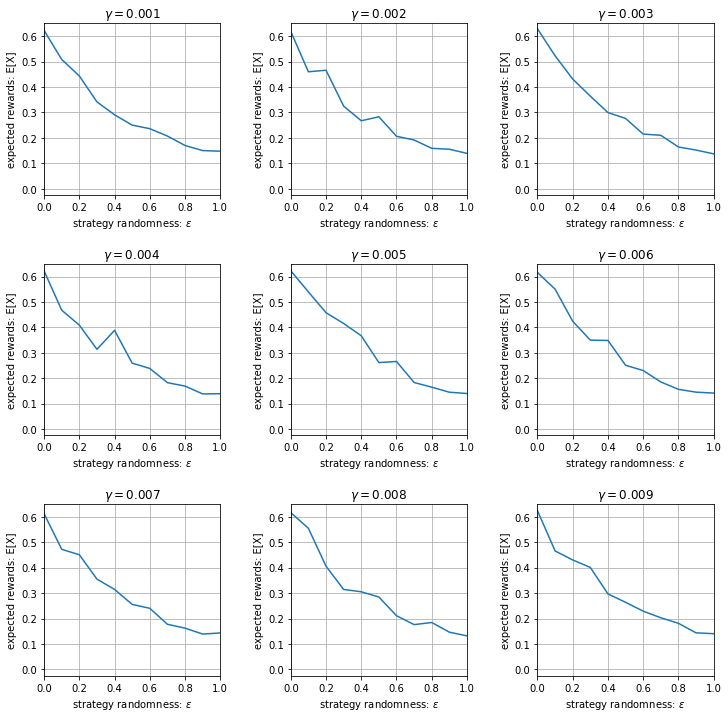

In [1218]:
x_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(9):
    x_value = x_range
    y_value = ex_rewards[i]
    ax = fig.add_subplot(3,3,i + 1)
    ax.grid(True)
    ax.set_title('$\gamma = 0.00$' + str(i + 1))
    ax.set_xlabel('strategy randomness: $\epsilon$')
    ax.set_ylabel('expected rewards: E[X]')
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([-0.025,0.65])
    ax.plot(x_value, y_value)
    
plt.savefig("experiment4_webpage4.png", format = 'png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

In [1115]:
degree = []
for i in range(int(D.number_of_nodes())):
    degree.append(len(D.out_edges(i)))
print(degree)
ave_degree = sum(degree) / len(degree)
print(ave_degree)

[0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 2, 2, 2, 1, 4, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 4, 7, 3, 2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 2, 2, 1, 2, 1, 1, 3, 1, 2, 4, 3, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 1, 5, 1, 2, 1, 2, 2, 1, 3, 6, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 4, 3, 2, 1, 2, 1, 1, 2, 4, 1, 1, 1, 5, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 4, 1, 1, 3, 2, 6, 2, 3, 1, 3, 1, 1, 2, 2, 2, 2, 2, 5, 5, 1, 1, 6, 4, 1, 1, 2, 2, 1, 6, 2, 4, 2, 2, 1, 2, 1, 1, 1, 3, 2, 5, 1, 1, 2, 4, 3, 4, 1, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 6, 1, 1, 1, 1, 1, 6, 7, 1, 1, 2, 2, 2, 2, 4, 4, 1, 1, 2, 3, 1, 4, 2, 3, 1, 1, 1, 3, 2, 7, 1, 1, 1, 3, 1, 2, 1, 2, 4, 1, 4, 2, 3, 1, 1, 1, 2, 1, 2, 1, 4, 2, 2, 2, 3, 1, 1, 2, 1, 3, 8, 2, 2, 4, 2, 1, 7, 3, 1, 8, 3, 2, 1, 2, 1, 1, 2, 1, 5, 1, 1, 1, 5, 2, 1, 1, 3, 2, 3, 1, 3, 4, 4, 3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 3, 7, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 3, 3, 3, 2, 2, 1, 2, 1, 7, 1, 4, 1, 1, 9, 3, 4, 4, 